In [44]:
import numpy as np
import matplotlib.pyplot as plt

from PDE_FIND import *


PDE derived from data:
p_t = (0.004635 +0.000000i)
    + (6.452665 +0.000000i)u
    + (-5.920940 +0.000000i)u^2
    + (-33.631054 +0.000000i)u^3
    + (45.487694 +0.000000i)u^4
    + (-11.201515 +0.000000i)u^5
    + (1.252523 +0.000000i)u_{x}
    + (-2.732807 +0.000000i)uu_{x}
    + (6.252017 +0.000000i)u^2u_{x}
    + (-5.736467 +0.000000i)u^3u_{x}
    + (2.350558 +0.000000i)u^4u_{x}
    + (-0.307426 +0.000000i)u^5u_{x}
    + (0.450161 +0.000000i)u_{xx}
    + (-0.646897 +0.000000i)uu_{xx}
    + (1.926425 +0.000000i)u^2u_{xx}
    + (-0.579321 +0.000000i)u^3u_{xx}
    + (0.151911 +0.000000i)u^4u_{xx}
    + (-0.056487 +0.000000i)u^5u_{xx}
    + (0.001471 +0.000000i)u_{xxx}
    + (-0.021285 +0.000000i)uu_{xxx}
    + (0.058527 +0.000000i)u^2u_{xxx}
    + (-0.057538 +0.000000i)u^3u_{xxx}
    + (0.024719 +0.000000i)u^4u_{xxx}
    + (-0.003324 +0.000000i)u^5u_{xxx}
    + (0.000213 +0.000000i)u_{xxxx}
    + (-0.005755 +0.000000i)uu_{xxxx}
    + (0.014826 +0.000000i)u^2u_{xxxx}
    + (-0.006868

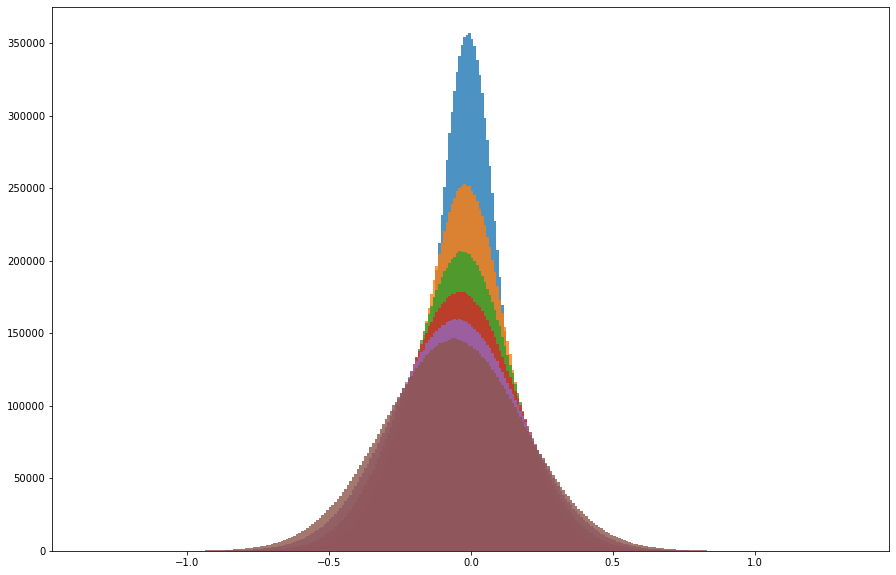

In [47]:
length = 10**7
dt = 0.01
c = -1
np.random.seed(0)
pos = np.cumsum(np.sqrt(dt)*np.random.randn(length)) + c*dt*np.arange(length)
np.random.randn
P = {}
M = 0

m = 6
n = 300

for i in range(m):
    P[i] = []
    
for i in range(len(pos)-m):
    
    # center
    y = pos[i+1:i+m+1] - pos[i]
    M = max([M, max(abs(y))])
    
    # add to distribution
    for j in range(m):
        P[j].append(y[j])

plt.figure(figsize=(15,10))
bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T = np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label='$t = %.2f$' % (i*dt+dt),alpha=0.8)[0]/float(dx*(len(pos)-m))
    
# np.save('../Data/srw_drift_diffusion.npy',U)
# plt.xlabel('Location', fontsize = 15)
# plt.ylabel(r'$f(x,t)$', fontsize = 15)
# plt.title(r'Histograms for $f(x,t)$', fontsize = 20)
# plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
# plt.grid('on')
# plt.savefig('../../Plots/srw_hist.png')
# plt.legend(loc = 'upper right', fontsize = 14)


Ut,R,rhs_des = build_linear_system(U, dt, dx, D=2, P=2, time_diff = 'FD', deg_x = 5,deg_t=3)


# print "Candidate functions for PDE"
# for func in ['1'] + rhs_des[1:]: print func

Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', deg_x = 4)
w = TrainSTRidge(R, Ut, 10**-2, 10, normalize = 2)

print("\nPDE derived from data:")
print_pde(w, rhs_des)

print("PDE derived with greedy algorithm (Correct PDE!)")
w = FoBaGreedy(R, Ut,10)
print_pde(w, rhs_des)

In [46]:
length = 10**7
dt = 0.01
c = -0.5
np.random.seed(0)
pos = np.cumsum(np.sqrt(dt)*np.random.randn(length)) + c*dt*np.arange(length)
np.random.randn
P = {}
M = 0

m = 6
n = 300

for i in range(m):
    P[i] = []
    
for i in range(len(pos)-m):
    
    # center
    y = pos[i+1:i+m+1] - pos[i]
    M = max([M, max(abs(y))])
    
    # add to distribution
    for j in range(m):
        P[j].append(y[j])

plt.figure(figsize=(15,10))
bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T = np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label='$t = %.2f$' % (i*dt+dt),alpha=0.8)[0]/float(dx*(len(pos)-m))
    
# np.save('../Data/srw_drift_diffusion.npy',U)
# plt.xlabel('Location', fontsize = 15)
# plt.ylabel(r'$f(x,t)$', fontsize = 15)
# plt.title(r'Histograms for $f(x,t)$', fontsize = 20)
# plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
# plt.grid('on')
# plt.savefig('../../Plots/srw_hist.png')
# plt.legend(loc = 'upper right', fontsize = 14)


Ut,R,rhs_des = build_linear_system(U, dt, dx, D=2, P=2, time_diff = 'FD', deg_x = 5,deg_t=3)


# print "Candidate functions for PDE"
# for func in ['1'] + rhs_des[1:]: print func

Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', deg_x = 4)
w = TrainSTRidge(R, Ut, 10**-2, 10, normalize = 2)

print("\nPDE derived from data:")
print_pde(w, rhs_des)


KeyboardInterrupt: 


PDE derived from data:
p_t = (0.004635 +0.000000i)
    + (6.452665 +0.000000i)u
    + (-5.920940 +0.000000i)u^2
    + (-33.631054 +0.000000i)u^3
    + (45.487694 +0.000000i)u^4
    + (-11.201515 +0.000000i)u^5
    + (1.252523 +0.000000i)u_{x}
    + (-2.732807 +0.000000i)uu_{x}
    + (6.252017 +0.000000i)u^2u_{x}
    + (-5.736467 +0.000000i)u^3u_{x}
    + (2.350558 +0.000000i)u^4u_{x}
    + (-0.307426 +0.000000i)u^5u_{x}
    + (0.450161 +0.000000i)u_{xx}
    + (-0.646897 +0.000000i)uu_{xx}
    + (1.926425 +0.000000i)u^2u_{xx}
    + (-0.579321 +0.000000i)u^3u_{xx}
    + (0.151911 +0.000000i)u^4u_{xx}
    + (-0.056487 +0.000000i)u^5u_{xx}
    + (0.001471 +0.000000i)u_{xxx}
    + (-0.021285 +0.000000i)uu_{xxx}
    + (0.058527 +0.000000i)u^2u_{xxx}
    + (-0.057538 +0.000000i)u^3u_{xxx}
    + (0.024719 +0.000000i)u^4u_{xxx}
    + (-0.003324 +0.000000i)u^5u_{xxx}
    + (0.000213 +0.000000i)u_{xxxx}
    + (-0.005755 +0.000000i)uu_{xxxx}
    + (0.014826 +0.000000i)u^2u_{xxxx}
    + (-0.006868

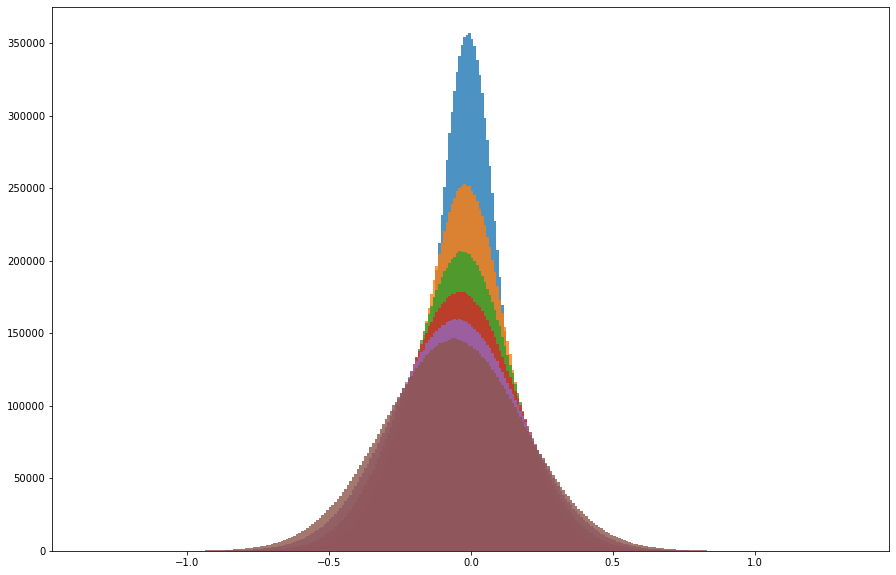

In [23]:
length = 10**7
dt = 0.01
c = -1.0
np.random.seed(0)
pos = np.cumsum(np.sqrt(dt)*np.random.randn(length)) + c*dt*np.arange(length)
np.random.randn
P = {}
M = 0

m = 6
n = 300

for i in range(m):
    P[i] = []
    
for i in range(len(pos)-m):
    
    # center
    y = pos[i+1:i+m+1] - pos[i]
    M = max([M, max(abs(y))])
    
    # add to distribution
    for j in range(m):
        P[j].append(y[j])

plt.figure(figsize=(15,10))
bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T = np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label='$t = %.2f$' % (i*dt+dt),alpha=0.8)[0]/float(dx*(len(pos)-m))
    
# np.save('../Data/srw_drift_diffusion.npy',U)
# plt.xlabel('Location', fontsize = 15)
# plt.ylabel(r'$f(x,t)$', fontsize = 15)
# plt.title(r'Histograms for $f(x,t)$', fontsize = 20)
# plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
# plt.grid('on')
# plt.savefig('../../Plots/srw_hist.png')
# plt.legend(loc = 'upper right', fontsize = 14)


Ut,R,rhs_des = build_linear_system(U, dt, dx, D=2, P=2, time_diff = 'FD', deg_x = 5,deg_t=3)


# print "Candidate functions for PDE"
# for func in ['1'] + rhs_des[1:]: print func

Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', deg_x = 4)
w = TrainSTRidge(R, Ut, 10**-2, 10, normalize = 2)

print("\nPDE derived from data:")
print_pde(w, rhs_des)



PDE derived from data:
p_t = (0.012289 +0.000000i)
    + (7.459025 +0.000000i)u
    + (-4.812511 +0.000000i)u^2
    + (-38.887707 +0.000000i)u^3
    + (49.654453 +0.000000i)u^4
    + (-12.380432 +0.000000i)u^5
    + (1.960301 +0.000000i)u_{x}
    + (-4.687656 +0.000000i)uu_{x}
    + (10.497540 +0.000000i)u^2u_{x}
    + (-9.446895 +0.000000i)u^3u_{x}
    + (3.770326 +0.000000i)u^4u_{x}
    + (-0.478822 +0.000000i)u^5u_{x}
    + (0.442193 +0.000000i)u_{xx}
    + (-0.681487 +0.000000i)uu_{xx}
    + (1.721748 +0.000000i)u^2u_{xx}
    + (-0.279874 +0.000000i)u^3u_{xx}
    + (0.002942 +0.000000i)u^4u_{xx}
    + (-0.035427 +0.000000i)u^5u_{xx}
    + (0.001930 +0.000000i)u_{xxx}
    + (-0.036156 +0.000000i)uu_{xxx}
    + (0.097847 +0.000000i)u^2u_{xxx}
    + (-0.095134 +0.000000i)u^3u_{xxx}
    + (0.040073 +0.000000i)u^4u_{xxx}
    + (-0.005249 +0.000000i)u^5u_{xxx}
    + (0.000190 +0.000000i)u_{xxxx}
    + (-0.007029 +0.000000i)uu_{xxxx}
    + (0.015466 +0.000000i)u^2u_{xxxx}
    + (-0.00624

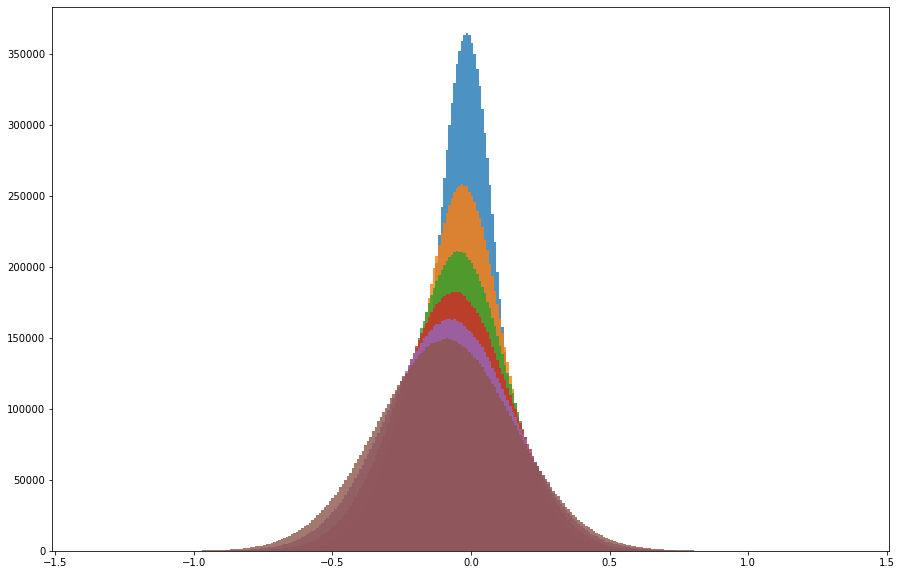

In [24]:
length = 10**7
dt = 0.01
c = -1.5
np.random.seed(0)
pos = np.cumsum(np.sqrt(dt)*np.random.randn(length)) + c*dt*np.arange(length)
np.random.randn
P = {}
M = 0

m = 6
n = 300

for i in range(m):
    P[i] = []
    
for i in range(len(pos)-m):
    
    # center
    y = pos[i+1:i+m+1] - pos[i]
    M = max([M, max(abs(y))])
    
    # add to distribution
    for j in range(m):
        P[j].append(y[j])

plt.figure(figsize=(15,10))
bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T = np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label='$t = %.2f$' % (i*dt+dt),alpha=0.8)[0]/float(dx*(len(pos)-m))
    
# np.save('../Data/srw_drift_diffusion.npy',U)
# plt.xlabel('Location', fontsize = 15)
# plt.ylabel(r'$f(x,t)$', fontsize = 15)
# plt.title(r'Histograms for $f(x,t)$', fontsize = 20)
# plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
# plt.grid('on')
# plt.savefig('../../Plots/srw_hist.png')
# plt.legend(loc = 'upper right', fontsize = 14)


Ut,R,rhs_des = build_linear_system(U, dt, dx, D=2, P=2, time_diff = 'FD', deg_x = 5,deg_t=3)


# print "Candidate functions for PDE"
# for func in ['1'] + rhs_des[1:]: print func

Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', deg_x = 4)
w = TrainSTRidge(R, Ut, 10**-2, 10, normalize = 2)

print("\nPDE derived from data:")
print_pde(w, rhs_des)

print("PDE derived with greedy algorithm (Correct PDE!)")
w = FoBaGreedy(R, Ut,10)
print_pde(w, rhs_des)


PDE derived with STRidge and L^2 normalization (Incorrect PDE)
p_t = (-0.118022 +0.000000i)
    + (10.740387 +0.000000i)u
    + (-44.515003 +0.000000i)u^2
    + (23.377424 +0.000000i)u^3
    + (17.953089 +0.000000i)u^4
    + (-7.573749 +0.000000i)u^5
    + (1.030612 +0.000000i)u_{x}
    + (-0.870336 +0.000000i)uu_{x}
    + (1.909699 +0.000000i)u^2u_{x}
    + (-1.458902 +0.000000i)u^3u_{x}
    + (0.474464 +0.000000i)u^4u_{x}
    + (-0.006263 +0.000000i)u^5u_{x}
    + (0.510033 +0.000000i)u_{xx}
    + (-0.929249 +0.000000i)uu_{xx}
    + (3.647053 +0.000000i)u^2u_{xx}
    + (-2.282893 +0.000000i)u^3u_{xx}
    + (0.679454 +0.000000i)u^4u_{xx}
    + (-0.105240 +0.000000i)u^5u_{xx}
    + (0.001457 +0.000000i)u_{xxx}
    + (0.006356 +0.000000i)uu_{xxx}
    + (-0.010943 +0.000000i)u^2u_{xxx}
    + (0.007127 +0.000000i)u^3u_{xxx}
    + (-0.001462 +0.000000i)u^4u_{xxx}
    + (0.000515 +0.000000i)u^5u_{xxx}
    + (0.000291 +0.000000i)u_{xxxx}
    + (-0.003643 +0.000000i)uu_{xxxx}
    + (0.018403

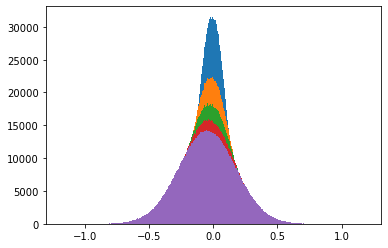

In [42]:
length = 10**6
dt = 0.01
c = -1
np.random.seed(0)
pos = np.cumsum(np.sqrt(dt)*np.random.randn(length)) + c*dt*np.arange(length)

P = {}
M = 0

m = 5
n = 300

for i in range(m):
    P[i] = []
    
for i in range(len(pos)-m):
    
    # center
    y = pos[i+1:i+m+1] - pos[i]
    M = max([M, max(abs(y))])
    
    # add to distribution
    for j in range(m):
        P[j].append(y[j])
    
bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T = np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label=r'$t = $' + str(i*dt+dt))[0]/float(dx*(len(pos)-m))
    
Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', deg_x = 4)

# print "Candidate functions for PDE"
# for func in ['1'] + rhs_des[1:]: print func

print("\nPDE derived with STRidge and L^2 normalization (Incorrect PDE)")
w = TrainSTRidge(R, Ut, 1e-5, 10)
print_pde(w, rhs_des)

print("PDE derived with STRidge without normalization (Incorrect PDE)")
w = TrainSTRidge(R, Ut, 1e-5, 0.1, normalize = 0)
print_pde(w, rhs_des)

print("PDE derived with greedy algorithm (Correct PDE!)")
w = FoBaGreedy(R, Ut,10)
print_pde(w, rhs_des)

print("PDE derived with Lasso (Incorrect PDE)")
w = Lasso(R, Ut, 350)
print_pde(w, rhs_des)

In [36]:
Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', deg_x = 4)

# print "Candidate functions for PDE"
# for func in ['1'] + rhs_des[1:]: print func

print("\nPDE derived with STRidge and L^2 normalization (Incorrect PDE)")
w = TrainSTRidge(R, Ut, 1e-5, 10)
print_pde(w, rhs_des)

print("PDE derived with STRidge without normalization (Incorrect PDE)")
w = TrainSTRidge(R, Ut, 1e-5, 0.1, normalize = 0)
print_pde(w, rhs_des)

print("PDE derived with greedy algorithm (Correct PDE!)")
w = FoBaGreedy(R, Ut,10)
print_pde(w, rhs_des)

print("PDE derived with Lasso (Incorrect PDE)")
w = Lasso(R, Ut, 350)
print_pde(w, rhs_des)


PDE derived with STRidge and L^2 normalization (Incorrect PDE)
p_t = (-0.118055 +0.000000i)
    + (1.900348 +0.000000i)u
    + (-16.128387 +0.000000i)u^2
    + (-2.146925 +0.000000i)u^3
    + (24.047043 +0.000000i)u^4
    + (-7.541391 +0.000000i)u^5
    + (-2.378520 +0.000000i)u_{x}
    + (2.715274 +0.000000i)uu_{x}
    + (-4.325988 +0.000000i)u^2u_{x}
    + (3.079344 +0.000000i)u^3u_{x}
    + (-1.273358 +0.000000i)u^4u_{x}
    + (0.154274 +0.000000i)u^5u_{x}
    + (0.538627 +0.000000i)u_{xx}
    + (-0.736723 +0.000000i)uu_{xx}
    + (2.800543 +0.000000i)u^2u_{xx}
    + (-1.687324 +0.000000i)u^3u_{xx}
    + (0.503150 +0.000000i)u^4u_{xx}
    + (-0.080790 +0.000000i)u^5u_{xx}
    + (-0.004571 +0.000000i)u_{xxx}
    + (0.033430 +0.000000i)uu_{xxx}
    + (-0.056385 +0.000000i)u^2u_{xxx}
    + (0.036683 +0.000000i)u^3u_{xxx}
    + (-0.013590 +0.000000i)u^4u_{xxx}
    + (0.001614 +0.000000i)u^5u_{xxx}
    + (0.000250 +0.000000i)u_{xxxx}
    + (-0.002111 +0.000000i)uu_{xxxx}
    + (0.012821

/home/nwachukwu/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


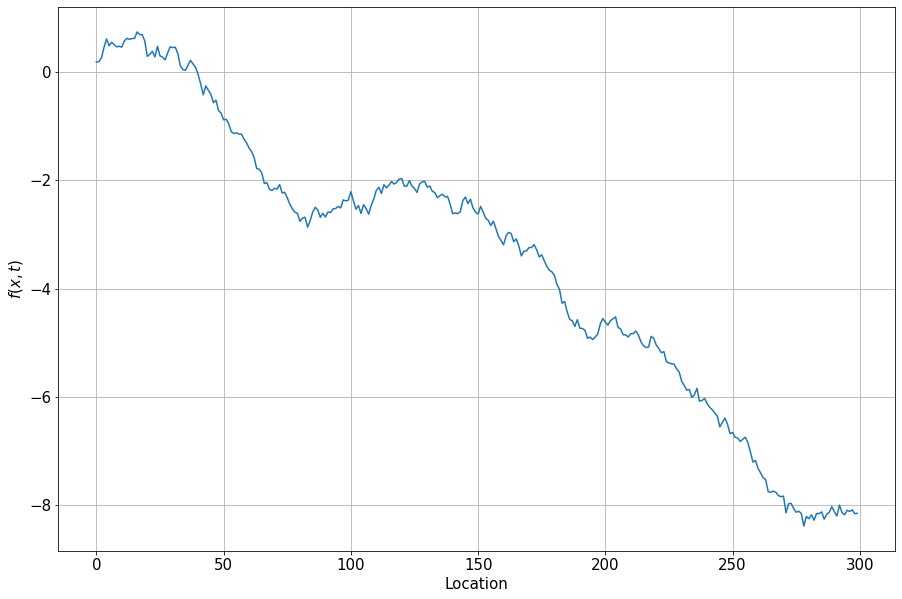

In [87]:
plt.figure(figsize=(15,10))

plt.xlabel('Location', fontsize = 15)
plt.ylabel(r'$f(x,t)$', fontsize = 15)
# plt.title(r'Histograms for $f(x,t)$', fontsize = 20)
plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
plt.plot(pos[:300])
plt.grid('on')
plt.savefig('../../Plots/srw_single_trajectory.png')

In [79]:
Ut,R,rhs_des = build_linear_system(U, dt, dx, D=2, P=2, time_diff = 'FD', deg_x = 5,deg_t=3)


# print "Candidate functions for PDE"
# for func in ['1'] + rhs_des[1:]: print func

print("\nPDE derived with STRidge and L^2 normalization (Incorrect PDE)")
w = TrainSTRidge(R, Ut, 1e-5, 10,STR_iters=100)
print_pde(w, rhs_des)

print("PDE derived with STRidge without normalization (Incorrect PDE)")
w = TrainSTRidge(R, Ut, 1e-5, 0.1, normalize = 0)
print_pde(w, rhs_des)

print("PDE derived with greedy algorithm (Correct PDE!)")
w = FoBaGreedy(R, Ut,10)
print_pde(w, rhs_des)

print("PDE derived with Lasso (Incorrect PDE)")
w = Lasso(R, Ut, 1)
print_pde(w, rhs_des)


PDE derived with STRidge and L^2 normalization (Incorrect PDE)
p_t = (0.235020 +0.000000i)
    + (-11.076054 +0.000000i)u
    + (10.967432 +0.000000i)u^2
    + (2.706044 +0.000000i)u_{x}
    + (0.395535 +0.000000i)uu_{x}
    + (-0.157163 +0.000000i)u^2u_{x}
    + (0.420514 +0.000000i)u_{xx}
    + (0.360100 +0.000000i)uu_{xx}
    + (-0.043267 +0.000000i)u^2u_{xx}
   
PDE derived with STRidge without normalization (Incorrect PDE)
p_t = (0.235020 +0.000000i)
    + (-11.076054 +0.000000i)u
    + (10.967432 +0.000000i)u^2
    + (2.706044 +0.000000i)u_{x}
    + (0.395535 +0.000000i)uu_{x}
    + (-0.157163 +0.000000i)u^2u_{x}
    + (0.420514 +0.000000i)u_{xx}
    + (0.360100 +0.000000i)uu_{xx}
    + (-0.043267 +0.000000i)u^2u_{xx}
   
PDE derived with greedy algorithm (Correct PDE!)
p_t = (2.128138 +0.000000i)u^2
    + (2.762738 +0.000000i)u_{x}
    + (0.498495 +0.000000i)u_{xx}
    + (0.075602 +0.000000i)uu_{xx}
   
PDE derived with Lasso (Incorrect PDE)
p_t = (0.259855 +0.000000i)
    + (-